# COCO Statistics Exploration
This Jupyter notebook aims to explore the distribution of the objects in the COCO validation dataset 2017.

In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import pandas as pd
import seaborn as sns
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
from matplotlib.patches import Rectangle
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
plt.rcParams['figure.figsize']=(10,10)
sns.set(context="talk")

In [2]:
# Define image directory
dataDir='.'
dataType='val2017'
annFile='{}/images/val2017_selected/annotations/instances_{}.json'.format(dataDir,dataType)

# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.61s)
creating index...
index created!


In [3]:
# display COCO categories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(', '.join(nms)))

COCO categories: 
person, bicycle, car, motorcycle, airplane, bus, train, truck, boat, traffic light, fire hydrant, stop sign, parking meter, bench, bird, cat, dog, horse, sheep, cow, elephant, bear, zebra, giraffe, backpack, umbrella, handbag, tie, suitcase, frisbee, skis, snowboard, sports ball, kite, baseball bat, baseball glove, skateboard, surfboard, tennis racket, bottle, wine glass, cup, fork, knife, spoon, bowl, banana, apple, sandwich, orange, broccoli, carrot, hot dog, pizza, donut, cake, chair, couch, potted plant, bed, dining table, toilet, tv, laptop, mouse, remote, keyboard, cell phone, microwave, oven, toaster, sink, refrigerator, book, clock, vase, scissors, teddy bear, hair drier, toothbrush



In [30]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=cats)
imgIds = coco.getImgIds(catIds=catIds)
img = coco.loadImgs(imgIds[0])[0]
print(img)

# get annotations of image
annIds = coco.getAnnIds(imgIds=imgIds, iscrowd=None)
anns = coco.loadAnns(annIds)
print(anns[0])

{'file_name': '000000532481.jpg', 'date_captured': '2013-11-20 16:28:24', 'id': 532481, 'width': 640, 'license': 3, 'height': 426, 'coco_url': 'http://images.cocodataset.org/val2017/000000532481.jpg', 'flickr_url': 'http://farm7.staticflickr.com/6048/5915494136_da3cfa7c5a_z.jpg'}
{'iscrowd': 0, 'id': 508910, 'bbox': [250.82, 168.26, 70.11, 64.88], 'image_id': 532481, 'segmentation': [[253.85, 187.23, 250.82, 193.01, 255.22, 199.6, 260.99, 202.35, 270.89, 204.55, 273.64, 211.15, 277.21, 222.15, 284.09, 228.47, 293.71, 232.04, 303.06, 233.14, 311.03, 231.77, 317.9, 224.9, 320.93, 215.55, 320.1, 206.48, 315.43, 199.05, 310.2, 193.56, 308.83, 186.13, 299.48, 182.28, 294.81, 182.01, 288.49, 175.96, 284.09, 169.36, 273.64, 168.26, 273.09, 172.94, 277.49, 177.34, 283.81, 181.46, 287.94, 184.48, 283.26, 188.06, 281.61, 190.53, 283.54, 196.58, 284.36, 202.9, 279.96, 198.5, 272.54, 194.93, 266.77, 195.21, 265.12, 194.38, 259.89, 189.43, 254.12, 186.96]], 'category_id': 1, 'area': 2188.0864999999

In [29]:
print(coco.getImgIds(catIds=80))
# print(imgIds)

[175364, 135561, 173008, 540502, 453302, 66841, 232348, 97022]


In [12]:
img = coco.loadImgs(imgIds[0])[0]
print(img)
print(anns[0])

{'file_name': '000000532481.jpg', 'date_captured': '2013-11-20 16:28:24', 'id': 532481, 'width': 640, 'license': 3, 'height': 426, 'coco_url': 'http://images.cocodataset.org/val2017/000000532481.jpg', 'flickr_url': 'http://farm7.staticflickr.com/6048/5915494136_da3cfa7c5a_z.jpg'}
{'iscrowd': 0, 'id': 508910, 'bbox': [250.82, 168.26, 70.11, 64.88], 'image_id': 532481, 'segmentation': [[253.85, 187.23, 250.82, 193.01, 255.22, 199.6, 260.99, 202.35, 270.89, 204.55, 273.64, 211.15, 277.21, 222.15, 284.09, 228.47, 293.71, 232.04, 303.06, 233.14, 311.03, 231.77, 317.9, 224.9, 320.93, 215.55, 320.1, 206.48, 315.43, 199.05, 310.2, 193.56, 308.83, 186.13, 299.48, 182.28, 294.81, 182.01, 288.49, 175.96, 284.09, 169.36, 273.64, 168.26, 273.09, 172.94, 277.49, 177.34, 283.81, 181.46, 287.94, 184.48, 283.26, 188.06, 281.61, 190.53, 283.54, 196.58, 284.36, 202.9, 279.96, 198.5, 272.54, 194.93, 266.77, 195.21, 265.12, 194.38, 259.89, 189.43, 254.12, 186.96]], 'category_id': 1, 'area': 2188.0864999999

## Build image data frame

In [13]:
df_images = pd.DataFrame(columns=['image_id', 'file_name', 'coco_url', 'width', 'height'])
for imgId in imgIds:
    img = coco.loadImgs(imgId)[0]
    df_images = df_images.append({
        'image_id': img['id'], 
        'file_name': img['file_name'], 
        'coco_url': img['coco_url'], 
        'width': img['width'], 
        'height': img['height']
    }, ignore_index=True)

In [ ]:
# convert data type
df_images['image_id'] = df_images['image_id'].astype(int)
df_images['file_name'] = df_images['file_name'].astype(str)
df_images['coco_url'] = df_images['coco_url'].astype(str)
df_images['width'] = df_images['width'].astype(float)
df_images['height'] = df_images['height'].astype(float)
df_images = df_images.sort_values(by=['image_id'])
df_images.reset_index()

In [12]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 90 to 94
Data columns (total 5 columns):
image_id     5000 non-null int64
file_name    5000 non-null object
coco_url     5000 non-null object
width        5000 non-null float64
height       5000 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 234.4+ KB


In [13]:
df_images.head()

,image_id,file_name,coco_url,width,height
90,139,000000000139.jpg,http://images.cocodataset.org/val2017/00000000...,640.0,426.0
174,285,000000000285.jpg,http://images.cocodataset.org/val2017/00000000...,586.0,640.0
1563,632,000000000632.jpg,http://images.cocodataset.org/val2017/00000000...,640.0,483.0
436,724,000000000724.jpg,http://images.cocodataset.org/val2017/00000000...,375.0,500.0
2764,776,000000000776.jpg,http://images.cocodataset.org/val2017/00000000...,428.0,640.0


In [14]:
df_images.to_csv('./images/val2017_selected/annotations/images_val2017.csv', header=True, index=False)

In [39]:
df_images = pd.read_csv('./images/val2017_selected/annotations/images_val2017.csv', header=0)

## Build object data frame

In [33]:
df_objects = pd.DataFrame(columns=['image_id', 'category_id', 'bbox_x', 'bbox_y', 'bbox_w', 'bbox_h'])
for ann in anns:
    df_objects = df_objects.append({
        'image_id': ann['image_id'], 
        'category_id': ann['category_id'], 
        'bbox_x': ann['bbox'][0], 
        'bbox_y': ann['bbox'][1], 
        'bbox_w': ann['bbox'][2],
        'bbox_h': ann['bbox'][3]
    }, ignore_index=True)

SystemError: <built-in function is_scalar> returned a result with an error set

In [ ]:
# convert data type
df_objects['image_id'] = df_objects['image_id'].astype(int)
df_objects['category_id'] = df_objects['category_id'].astype(int)
df_objects['bbox_x'] = df_objects['bbox_x'].astype(float)
df_objects['bbox_y'] = df_objects['bbox_y'].astype(float)
df_objects['bbox_w'] = df_objects['bbox_w'].astype(float)
df_objects['bbox_h'] = df_objects['bbox_h'].astype(float)
df_objects = df_objects.sort_values(by=['image_id', 'category_id'])
df_objects.reset_index()

In [ ]:
df_objects['center_x'] = df_objects['bbox_x'] + df_objects['bbox_w'] / 2.
df_objects['center_y'] = df_objects['bbox_y'] + df_objects['bbox_h'] / 2.

In [ ]:
# Get associated category name
catLblFile='{}/images/val2017_selected/annotations/coco-labels-paper.txt'.format(dataDir)
f = open(catLblFile, "r")
category_name = list()
for cat in f:
    category_name.append(cat)
cat_dict = {float(i): category_name[i - 1] for i in range(1, len(category_name)+1)}
df_objects['category_name'] = df_objects['category_id'].map(cat_dict)
df_objects['category_name'] = df_objects['category_name'].str.strip('\n')

In [20]:
df_objects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36781 entries, 675 to 713
Data columns (total 9 columns):
image_id         36781 non-null int64
category_id      36781 non-null int64
bbox_x           36781 non-null float64
bbox_y           36781 non-null float64
bbox_w           36781 non-null float64
bbox_h           36781 non-null float64
center_x         36781 non-null float64
center_y         36781 non-null float64
category_name    36781 non-null object
dtypes: float64(6), int64(2), object(1)
memory usage: 2.8+ MB


In [21]:
df_objects.head(20)

,image_id,category_id,bbox_x,bbox_y,bbox_w,bbox_h,center_x,center_y,category_name
675,139,1,412.80,157.61,53.05,138.01,439.325,226.615,person
676,139,1,384.43,172.21,15.12,35.74,391.990,190.080,person
671,139,62,358.98,218.05,56.00,102.83,386.980,269.465,chair
672,139,62,290.69,218.00,61.83,98.48,321.605,267.240,chair
673,139,62,413.20,223.01,30.17,81.36,428.285,263.690,chair
674,139,62,317.40,219.24,21.58,11.59,328.190,225.035,chair
684,139,62,412.25,219.02,9.63,12.52,417.065,225.280,chair
668,139,64,236.98,142.51,24.70,69.50,249.330,177.260,potted plant
687,139,67,321.21,231.22,125.56,88.93,383.990,275.685,dining table
669,139,72,7.03,167.76,149.32,94.87,81.690,215.195,tv


In [22]:
df_objects.to_csv('./images/val2017_selected/annotations/objects_val2017.csv', header=True, index=False)

In [38]:
df_objects = pd.read_csv('./images/val2017_selected/annotations/objects_val2017.csv', header=0)

In [10]:
print(df_objects['category_id'].unique())

[ 1 62 64 67 72 78 82 84 85 86 23 65  3  8 13 88 35 79 37 40 43 27 31  9
 16 77  7 51 54 42 73 74 76  6 17  5 24 10 32 53 39 46 47 49 61 50 52 60
 44 70 81 56 41 48 57 63 75  2 87 20 15 55 22 34 28 19  4 18 38 59 11 33
 58 21 25 36 14 90 80 89]


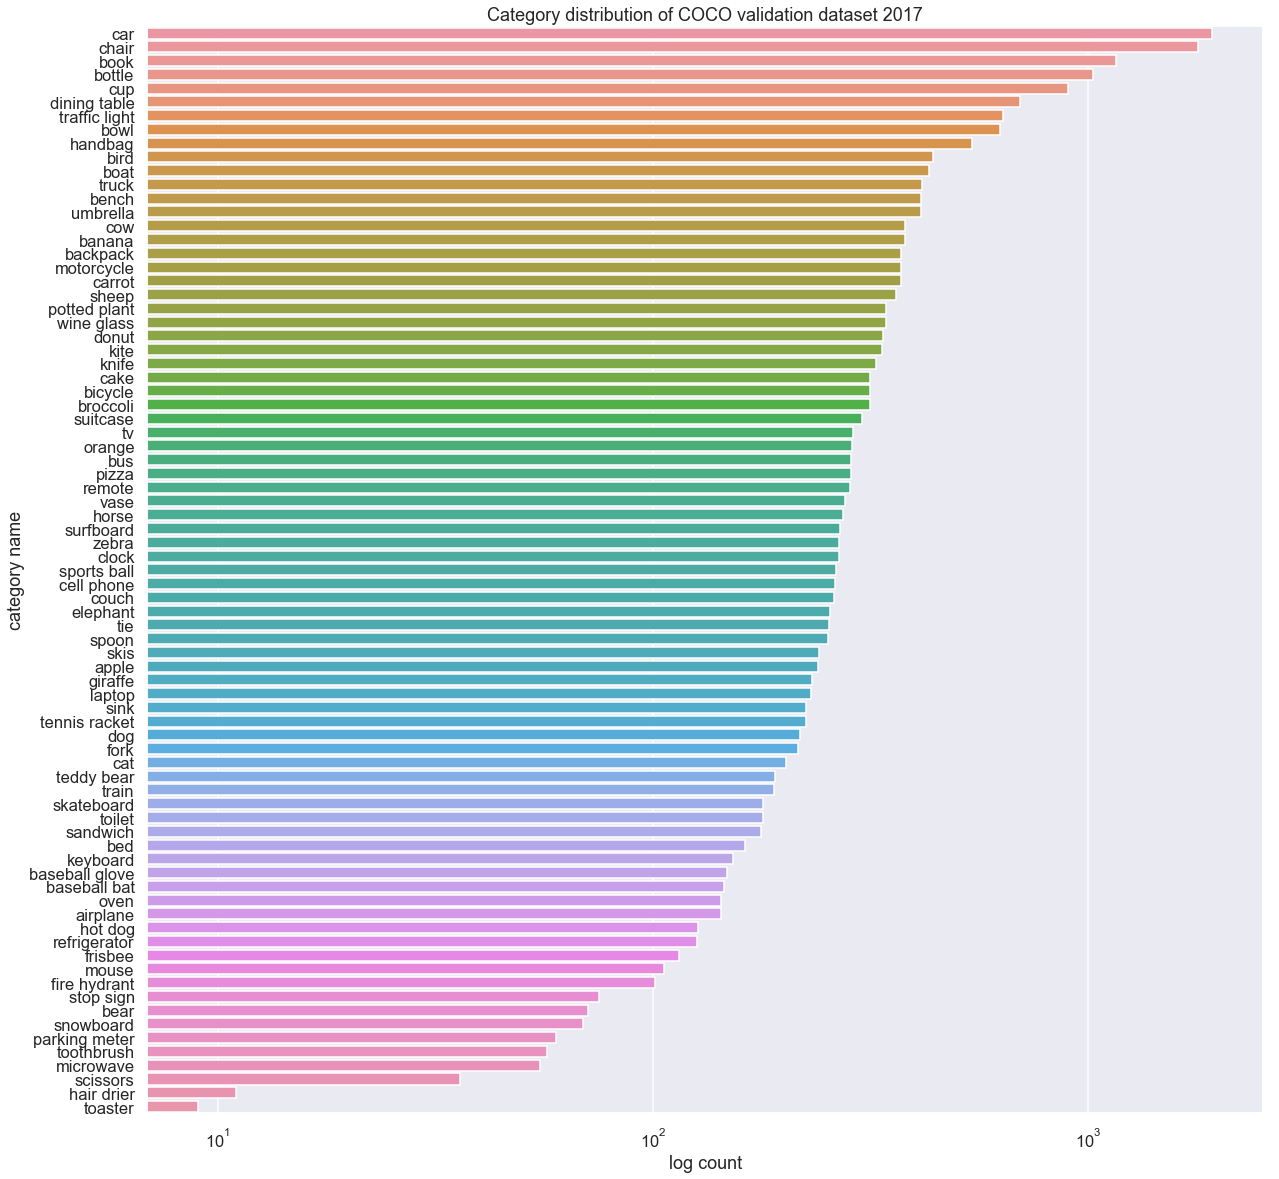

In [15]:
# ax = sns.countplot(y="category_name", data=df_objects, order=df_objects['category_name'].value_counts().index)
ax = sns.countplot(
    y="category_name", 
    data=df_objects[df_objects["category_name"]!="person"],
    order=df_objects[df_objects["category_name"]!="person"]['category_name'].value_counts().index)
ax.set_xscale("log")
plt.rcParams['figure.figsize']=(20,20)
# plt.xticks(rotation=90)
plt.ylabel("category name")
plt.xlabel("log count")
plt.title("Category distribution of COCO validation dataset 2017")
plt.show()

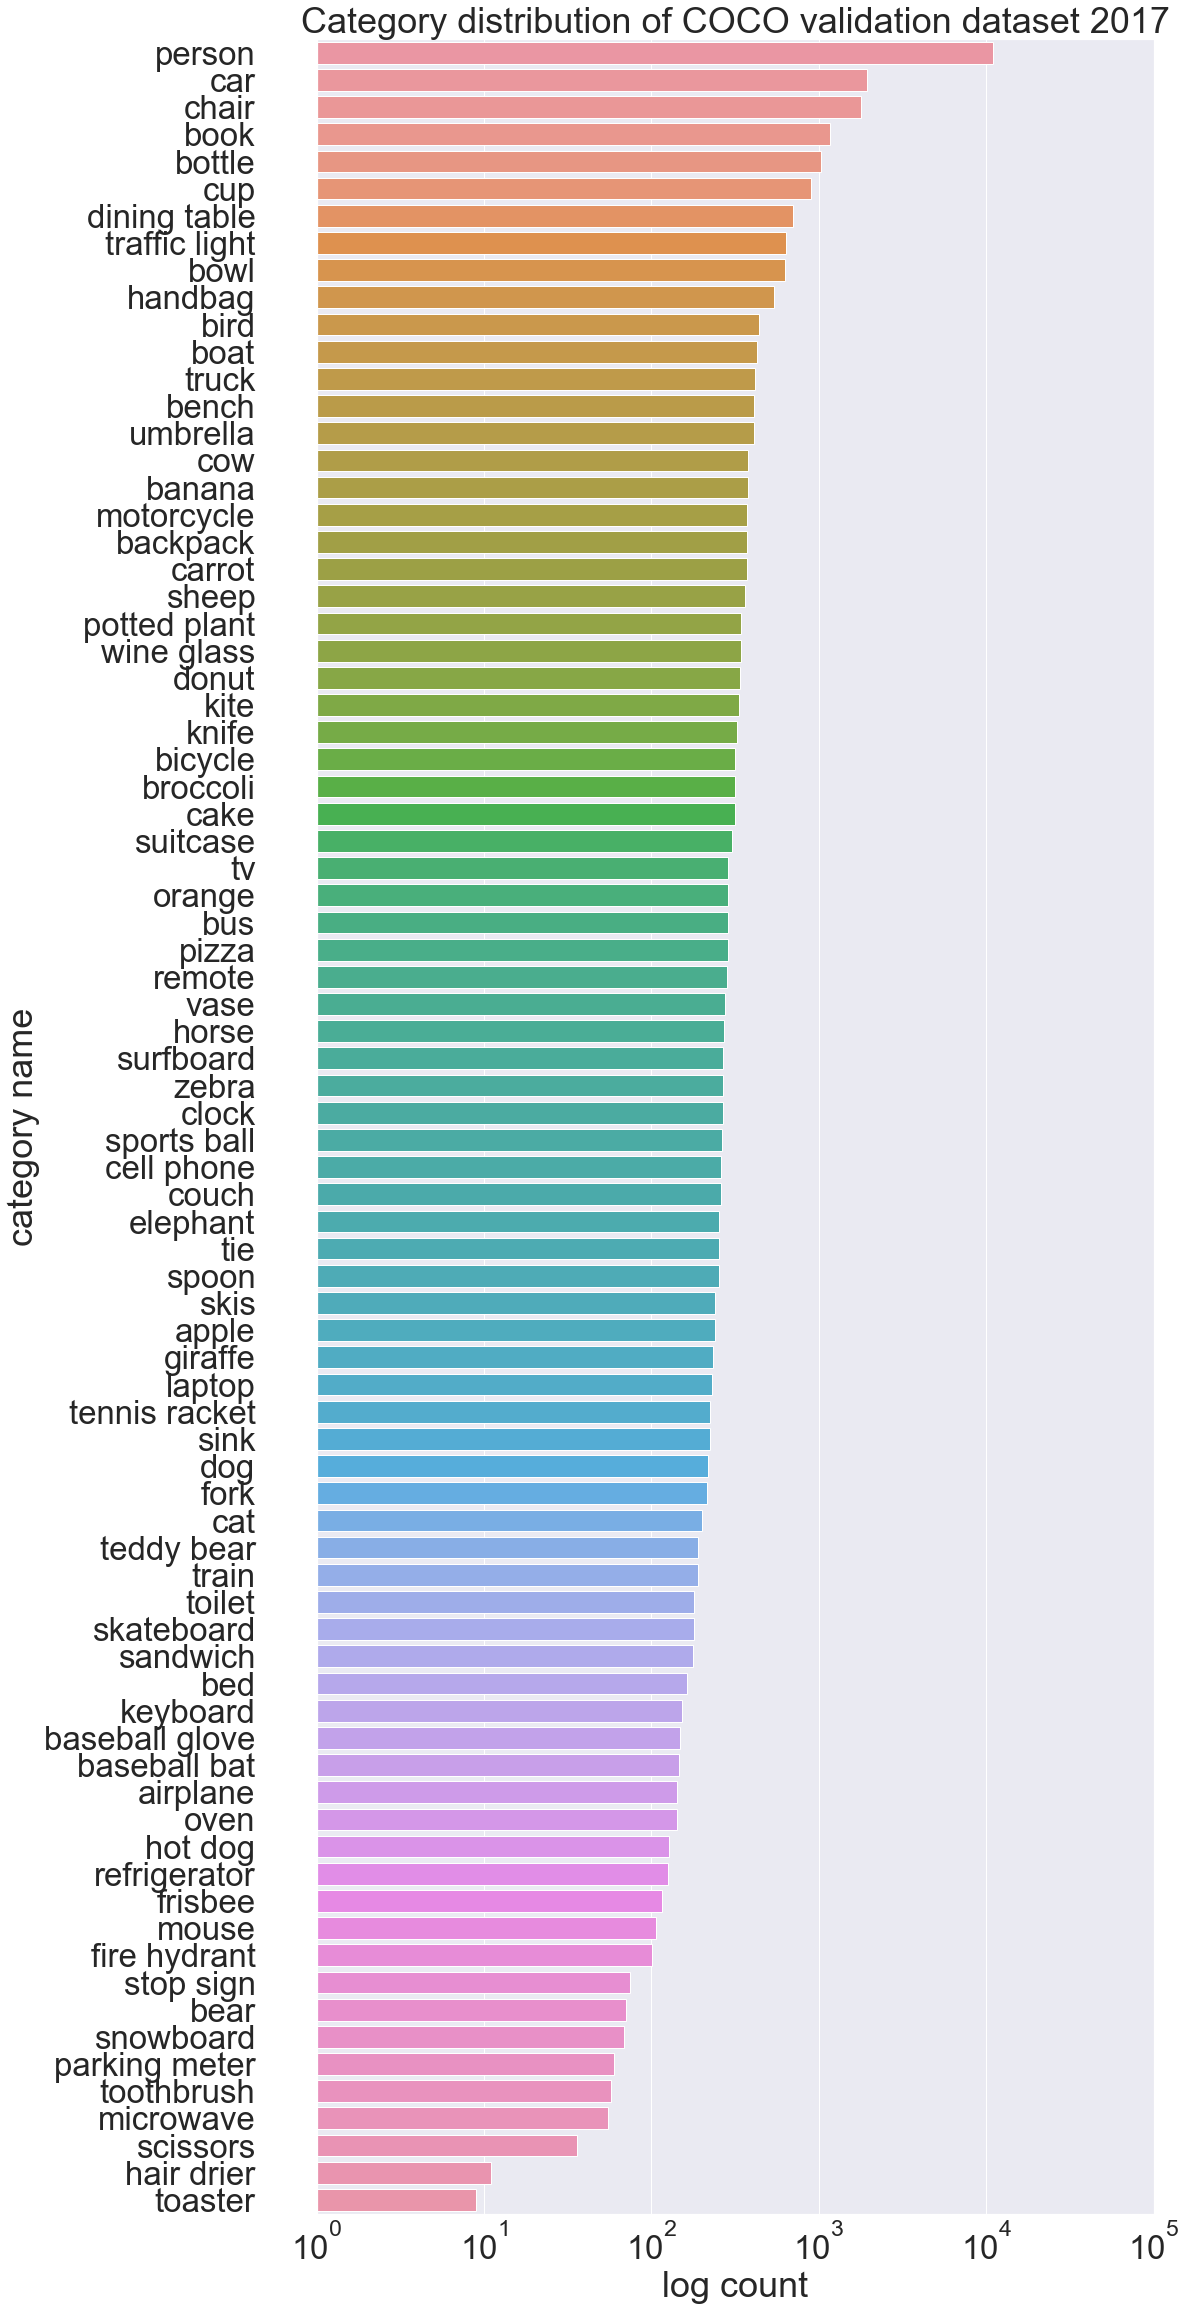

In [82]:
plt.rcParams['figure.figsize']=(15,40)
ax = sns.countplot(
    y="category_name", 
    data=df_objects,
    order=df_objects['category_name'].value_counts().index)
sns.set(font_scale = 3)
ax.set_xscale("log")
ax.tick_params(axis='y', which='major', pad=55)
plt.ylabel("category name")
plt.xlabel("log count")
plt.xlim(1e0,1e5)
plt.title("Category distribution of COCO validation dataset 2017")
plt.show()

## Join df_images and df_objects via image_id

In [40]:
df = pd.merge(df_images, df_objects, on='image_id', how='left')
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36781 entries, 0 to 36828
Data columns (total 13 columns):
image_id         36781 non-null int64
file_name        36781 non-null object
coco_url         36781 non-null object
width            36781 non-null float64
height           36781 non-null float64
category_id      36781 non-null float64
bbox_x           36781 non-null float64
bbox_y           36781 non-null float64
bbox_w           36781 non-null float64
bbox_h           36781 non-null float64
center_x         36781 non-null float64
center_y         36781 non-null float64
category_name    36781 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 3.9+ MB


## Visualize distribution of objects' center points

In [43]:
max_width = df['width'].max()
max_height = df['height'].max()

In [13]:
print(max_width, max_height)

640.0 640.0


In [41]:
def transform_coordinate(image_size, original_point, new_size):
    max_w, max_h = new_size
    image_w, image_h = image_size
    original_x, original_y = original_point
    offset_x = (max_w - image_w) / 2
    offset_y = (max_h - image_h) / 2
    return (offset_x + original_x), (offset_y + image_h - original_y)

In [44]:
df_graph = pd.DataFrame(columns=['x', 'y', 'w', 'h', 'x_center', 'y_center', 'cat_id', 'cat_name'])
for index, entry in df.iterrows():
    image_size = (entry['width'], entry['height'])
    bbox_centerpoint = (entry['center_x'], entry['center_y'])
    bbox_xy = (entry['bbox_x'], entry['bbox_y'])
    new_bbox_x_center, new_bbox_y_center = transform_coordinate(image_size, bbox_centerpoint, (max_width, max_height))
    new_bbox_x, new_bbox_y = transform_coordinate(image_size, bbox_xy, (max_width, max_height))
    df_graph = df_graph.append({
        'x': new_bbox_x, 'y': new_bbox_y, 'w': entry['bbox_w'], 'h': entry['bbox_h'],
        'x_center': new_bbox_x_center, 'y_center': new_bbox_y_center,
        'cat_id': entry['category_id'],
        'cat_name': entry['category_name']
        }, ignore_index=True)

KeyboardInterrupt: 

In [23]:
df_graph.to_csv('./images/val2017_selected/annotations/graph_val2017.csv', header=True, index=False)

In [45]:
df_graph = pd.read_csv('./images/val2017_selected/annotations/graph_val2017.csv', header=0)

In [16]:
df_graph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36781 entries, 0 to 36780
Data columns (total 8 columns):
x           36781 non-null float64
y           36781 non-null float64
w           36781 non-null float64
h           36781 non-null float64
x_center    36781 non-null float64
y_center    36781 non-null float64
cat_id      36781 non-null float64
cat_name    36781 non-null object
dtypes: float64(7), object(1)
memory usage: 2.2+ MB


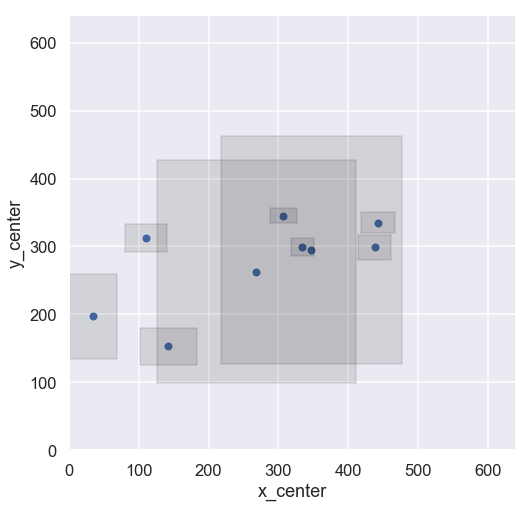

In [47]:
cat_name = 'toaster'
df_graph_filtered = df_graph[df_graph['cat_name']==cat_name]
ax = sns.scatterplot(x='x_center', y='y_center', data=df_graph_filtered)
for index, row in df_graph_filtered.iterrows():
    # create the shape
    rect = Rectangle((row["x"], row["y"]), row["w"], -row["h"], fill=True, color='black', alpha=0.1)
    # draw the box
    ax.add_patch(rect)
plt.rcParams['figure.figsize']=(8,8)
plt.xlim(0, max_width)
plt.ylim(0, max_height)
plt.show()

## Rescale images to max_width x max_height

In [48]:
def transform_rescale_coordinate(image_size, original_point, new_size):
    max_w, max_h = new_size
    image_w, image_h = image_size
    original_x, original_y = original_point
    new_x = (original_x/image_w)*max_w
    new_y = ((image_h-original_y)/image_h)*max_h
    return new_x, new_y

def transform_rescale_bboxsize(image_size, bboxsize, new_size):
    max_w, max_h = new_size
    bbox_w, bbox_h = bboxsize
    image_w, image_h = image_size
    new_w = (bbox_w/image_w)*max_w
    new_h = (bbox_h/image_h)*max_h
    return new_w, new_h

In [49]:
df_viz = pd.DataFrame(columns=['x', 'y', 'w', 'h', 'x_center', 'y_center', 'cat_id', 'cat_name'])
for index, entry in df.iterrows():
    image_size = (entry['width'], entry['height'])
    bbox_centerpoint = (entry['center_x'], entry['center_y'])
    bbox_xy = (entry['bbox_x'], entry['bbox_y'])
    bbox_wh = (entry['bbox_w'], entry['bbox_h'])
    new_bbox_x_center, new_bbox_y_center = transform_rescale_coordinate(image_size, bbox_centerpoint, (max_width, max_height))
    new_bbox_x, new_bbox_y = transform_rescale_coordinate(image_size, bbox_xy, (max_width, max_height))
    new_bbox_w, new_bbox_h = transform_rescale_bboxsize(image_size, bbox_wh, (max_width, max_height))
    df_viz = df_viz.append({
        'x': new_bbox_x, 'y': new_bbox_y, 'w': new_bbox_w, 'h': new_bbox_h,
        'x_center': new_bbox_x_center, 'y_center': new_bbox_y_center,
        'cat_id': entry['category_id'],
        'cat_name': entry['category_name']
        }, ignore_index=True)

KeyboardInterrupt: 

In [37]:
df_viz.to_csv('./images/val2017_selected/annotations/viz_val2017.csv', header=True, index=False)

In [50]:
df_viz = pd.read_csv('./images/val2017_selected/annotations/viz_val2017.csv', header=0)

In [20]:
df_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36781 entries, 0 to 36780
Data columns (total 8 columns):
x           36781 non-null float64
y           36781 non-null float64
w           36781 non-null float64
h           36781 non-null float64
x_center    36781 non-null float64
y_center    36781 non-null float64
cat_id      36781 non-null float64
cat_name    36781 non-null object
dtypes: float64(7), object(1)
memory usage: 2.2+ MB


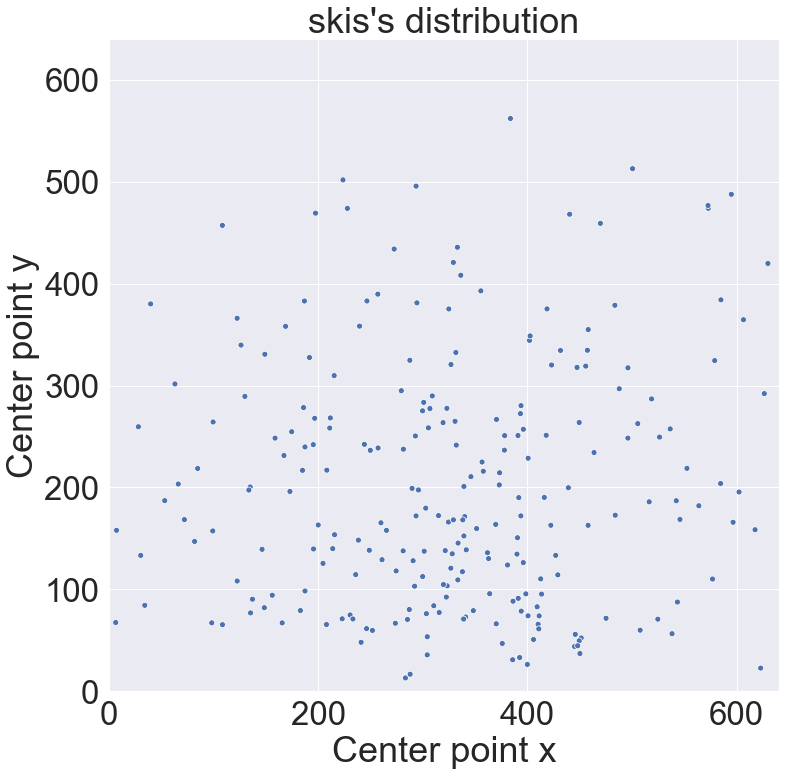

In [95]:
cat_name = 'skis'
plt.rcParams['figure.figsize']=(12,12)
sns.scatterplot(x='x_center', y='y_center', data=df_viz[df_viz['cat_name']==cat_name], hue='cat_name', legend=None)
plt.xlabel("Center point x")
plt.ylabel("Center point y")
plt.xlim(0, max_width)
plt.ylim(0, max_height)
plt.title(cat_name+"'s distribution")
# plt.savefig("./images/val2017_object_distribution/_" + cat_name + '.png')
plt.show()

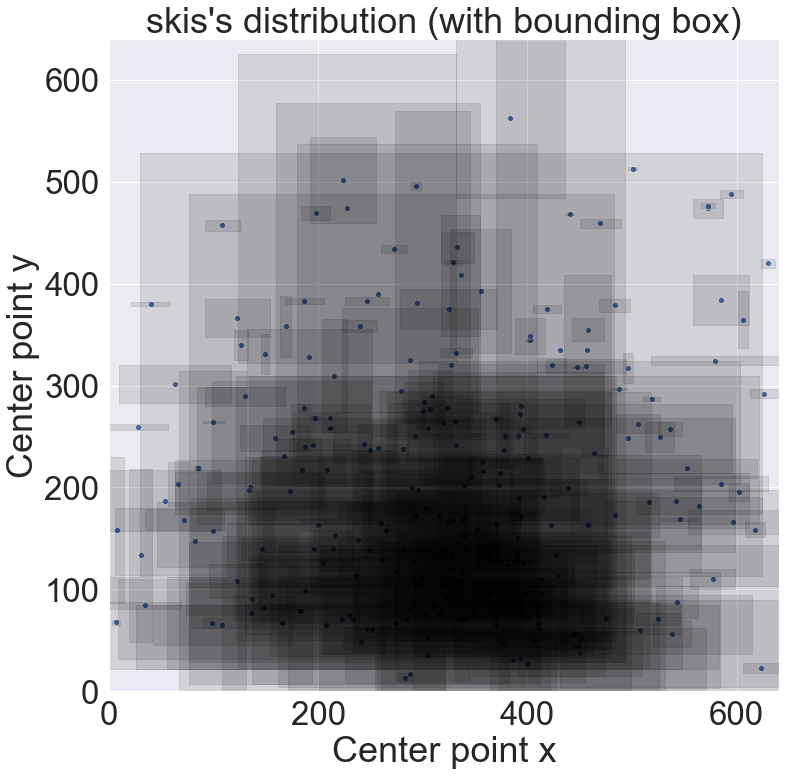

In [94]:
cat_name = 'skis'
df_viz_filtered = df_viz[df_viz['cat_name']==cat_name]
plt.rcParams['figure.figsize']=(12,12)
ax = sns.scatterplot(x='x_center', y='y_center', data=df_viz_filtered)
for index, row in df_viz_filtered.iterrows():
    # create the shape
    rect = Rectangle((row["x"], row["y"]), row["w"], -row["h"], fill=True, color='black', alpha=0.1)
    # draw the box
    ax.add_patch(rect)
plt.xlim(0, max_width)
plt.ylim(0, max_height)
plt.title(cat_name+"'s distribution (with bounding box)")
plt.xlabel("Center point x")
plt.ylabel("Center point y")
# plt.savefig("./images/val2017_object_distribution/" + cat_name + '.png')
plt.show()

In [53]:
plt.savefig("./images/object_distribution/" + cat_name + '.png')

<Figure size 576x576 with 0 Axes>

## Automate visualizing object distribution

car
motorcycle
airplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
couch
potted plant
bed
dining table
toilet
tv
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush


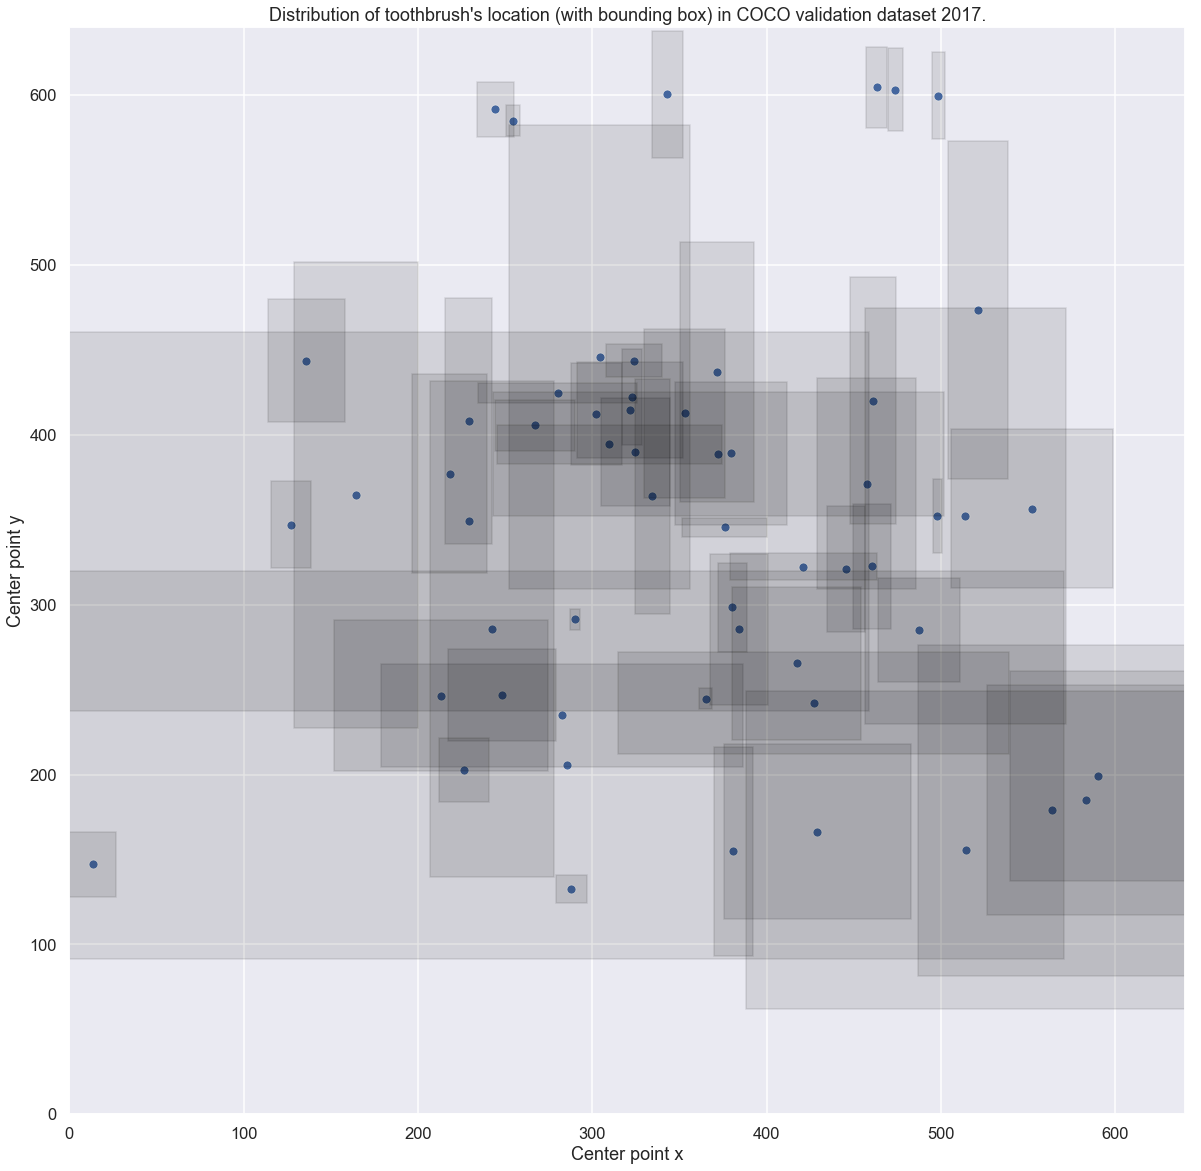

In [65]:
for cat in cats:
    plt.clf()
    cat_name = cat['name']
    print(cat_name)
    df_viz_filtered = df_viz[df_viz['cat_name']==cat_name]
    ax = sns.scatterplot(x='x_center', y='y_center', data=df_viz_filtered)
    for index, row in df_viz_filtered.iterrows():
        # create the shape
        rect = Rectangle((row["x"], row["y"]), row["w"], -row["h"], fill=True, color='black', alpha=0.1)
        # draw the box
        ax.add_patch(rect)
    plt.rcParams['figure.figsize']=(8,8)
    plt.xlim(0, max_width)
    plt.ylim(0, max_height)
    plt.title("Distribution of "+cat_name+"'s location (with bounding box) in COCO validation dataset 2017.")
    plt.xlabel("Center point x")
    plt.ylabel("Center point y")
    plt.savefig("./images/val2017_object_distribution/" + cat_name + '.png')
    # plt.show()

In [69]:
for cat in cats[:2]:
    plt.clf()
    cat_name = cat['name']
    print(cat_name)
    sns.scatterplot(x='x_center', y='y_center', data=df_viz[df_viz['cat_name']==cat_name], hue='cat_name', legend=None)
    plt.rcParams['figure.figsize']=(20,20)
    plt.xlim(0, max_width)
    plt.ylim(0, max_height)
    plt.savefig("./images/val2017_object_distribution/_" + cat_name + '.png')
    # plt.show()

person
bicycle


<Figure size 1440x1440 with 0 Axes>